In [18]:
from math import exp, sqrt, pi

def normal_dist(x, mu, sig):
    return exp(-0.5*((x-mu)/sig)**2)/(sig*sqrt(2*pi))


mu = 2.34321
sig = 1.233
def target_dist(x):
    return normal_dist(x, mu, sig)


print(target_dist(mu))
print(target_dist(0))

0.32355416090951555
0.05317458453940047


In [19]:
import random
def MarkovTransition(src: float) -> float:
    r = random.random()
    dest = src + 2*(r-0.5)  # uniform distribution on the interval [src-1, src+1]
    return dest

print(MarkovTransition(0))

-0.19144093713176624


In [20]:
def metropolis_mcmc(n):
    Xs = (random.random()-0.5)*10
    samples = [Xs]
    for i in range(n):
        xi = samples[-1]
        x = MarkovTransition(xi)
        alpha = target_dist(x)/target_dist(xi)
        u = random.random()
        if u < alpha:
            samples.append(x)
        else:
            samples.append(xi)
    return samples


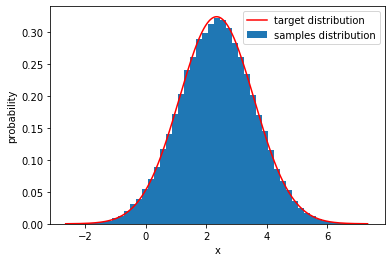

In [21]:
from matplotlib import pyplot as plt 
import numpy as np

n = 100000
samples = metropolis_mcmc(n)
Y = [0 for _ in range(len(samples))]
plt.hist(samples, density=True, bins=50, label = "samples distribution")

targetX = np.linspace(mu-5, mu+5, 1000)
targetY = [target_dist(x) for x in targetX]
plt.plot(targetX, targetY, color="red", label="target distribution")

plt.xlabel("x")
plt.ylabel("probability")
plt.legend()
plt.show()